# **Лабораторная работа №1**

## **Выполнил:**
Студент группы М8О-312Б-22 Комбаров Владислав

Вариант №1

# 1. Numpy

Необходимо использовать функции и методы библиотеки numpy. Использовать циклы, генераторы списков **запрещено**.

In [3]:
import numpy as np

1. Создайте матрицу $3 × 3 $ со значениями от 0 до 8.

In [6]:
matrix = np.arange(9).reshape(3, 3)
print(matrix)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


2. Создайте матрицу шахматной доски  $8 × 8 $, заполненную 'B' и 'W', используя функцию tile.

In [9]:
board_pattern = np.array([['B', 'W'], ['W', 'B']])
chess_board = np.tile(board_pattern, (4, 4))
print(chess_board)

[['B' 'W' 'B' 'W' 'B' 'W' 'B' 'W']
 ['W' 'B' 'W' 'B' 'W' 'B' 'W' 'B']
 ['B' 'W' 'B' 'W' 'B' 'W' 'B' 'W']
 ['W' 'B' 'W' 'B' 'W' 'B' 'W' 'B']
 ['B' 'W' 'B' 'W' 'B' 'W' 'B' 'W']
 ['W' 'B' 'W' 'B' 'W' 'B' 'W' 'B']
 ['B' 'W' 'B' 'W' 'B' 'W' 'B' 'W']
 ['W' 'B' 'W' 'B' 'W' 'B' 'W' 'B']]


3. Найти индексы ненулевых элементов в произвольном массиве, например: $ [1,2,0,0,4,0,0,4,6,4,0] $


In [12]:
array = np.array([1,2,0,0,4,0,0,4,6,4,0])
inds = np.nonzero(array)
print(inds)

(array([0, 1, 4, 7, 8, 9], dtype=int64),)


4. Создайте двумерный массив с единицами на границах и нулями внутри, например:

$ 1 1 1 1 1 $

$ 1 0 0 0 1 $

$ 1 0 0 0 1 $

$ 1 1 1 1 1 $


In [15]:
def create(rows, cols):
    array = np.zeros((rows, cols), dtype=int)
    array[0, :] = 1
    array[-1, :] = 1
    array[:, 0] = 1
    array[:, -1] = 1
    return array

rows = 5
cols = 5
array = create(rows, cols)
print(array)

[[1 1 1 1 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 0 0 0 1]
 [1 1 1 1 1]]


5. Создайте случайный вектор размером 15 и замените максимальное значение на $NaN$.


In [18]:
random_vector = np.random.rand(15)

#print(random_vector)
max_index = np.argmax(random_vector)
random_vector[max_index] = np.nan

print(random_vector)

[0.37089877 0.62812804 0.26905837 0.62998162 0.1827562  0.15138365
        nan 0.85713392 0.21589209 0.14180073 0.48444663 0.82715872
 0.41745345 0.3313974  0.88530052]


6. Рассмотрим массив размерности $(6, 7, 8)$. Каков индекс $(i,j,k)$ 100-го элемента?

In [21]:
shape = (6, 7, 8)

line_index = 99
multi_index = np.unravel_index(line_index, shape)

print(multi_index)

(1, 5, 3)


7. Рассмотрим случайную матрицу  $15 × 2 $, представляющую декартовы координаты, преобразуйте их в полярные координаты.

In [24]:
dec_coords = np.random.rand(15, 2)

x = dec_coords[:, 0]
y = dec_coords[:, 1]

r = np.sqrt(x**2 + y**2)
theta = np.arctan2(y, x)

polar_coords = np.column_stack((r, theta))

print(polar_coords)

[[0.75115591 1.41528414]
 [0.44608139 0.66170578]
 [1.38665085 0.80547012]
 [0.72203106 1.16044944]
 [0.82889992 0.00693292]
 [1.01207723 1.37633394]
 [1.15770131 0.53621649]
 [0.45578742 1.14809209]
 [0.88528144 1.06776503]
 [0.33451139 0.08835945]
 [0.88071998 0.8766839 ]
 [0.54608171 0.03540635]
 [0.84005602 1.07171999]
 [1.02522275 1.23266107]
 [1.32256317 0.85207924]]


8. По двум массивам $x$ и $y$ постройте матрицу Коши $C$
 $(C_{ij} =\frac{1}{x_i - y_j})$

In [27]:
def cauchy_matrix(x, y):

    diff = x[:, np.newaxis] - y
    
    with np.errstate(divide='ignore', invalid='ignore'):
        result = 1.0 / diff
    return result

x = np.array([1, 2, 3])
y = np.array([3, 4, 5])
matrix = cauchy_matrix(x, y)
print(matrix)

[[-0.5        -0.33333333 -0.25      ]
 [-1.         -0.5        -0.33333333]
 [        inf -1.         -0.5       ]]


9. Рассмотрим матрицу $10 × 3 $, извлеките строки с неравными значениями (например, $[2,2,3]$).

In [30]:
matrix = np.random.randint(1, 10, (10, 3)).tolist()
print(matrix)

def has_multiple_unique_values(row):
    return len(set(row)) > 1

non_equal_rows = list(filter(has_multiple_unique_values, matrix))

print(non_equal_rows)

[[2, 9, 3], [1, 9, 2], [5, 3, 7], [4, 5, 3], [1, 4, 3], [4, 2, 8], [8, 6, 3], [5, 3, 2], [4, 8, 2], [8, 9, 2]]
[[2, 9, 3], [1, 9, 2], [5, 3, 7], [4, 5, 3], [1, 4, 3], [4, 2, 8], [8, 6, 3], [5, 3, 2], [4, 8, 2], [8, 9, 2]]


10. Извлеките уникальные строки из двумерного массива.


In [36]:
matrix = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [1, 2, 3],
    [7, 8, 9],
    [4, 5, 6]
])

unique_rows = np.unique(matrix, axis=0)

print(unique_rows)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


# 2. Pandas

# Найдите ответы на вопросы с помощью предложенного датасета:

Файл с датасетом - `olympics_dataset.csv`

In [42]:
import pandas as pd

In [76]:
ds = pd.read_csv('C:/Users/User/Desktop/ML/Lab_1/olympics_dataset.csv')

# Вывести первые пять строк датасета
print(ds.head())

   player_id                   Name Sex            Team  NOC  Year  Season  \
0          0              A Dijiang   M           China  CHN  1992  Summer   
1          1               A Lamusi   M           China  CHN  2012  Summer   
2          2            Gunnar Aaby   M         Denmark  DEN  1920  Summer   
3          3            Edgar Aabye   M  Denmark/Sweden  DEN  1900  Summer   
4         26  Cornelia (-strannood)   F     Netherlands  NED  1932  Summer   

          City       Sport                         Event     Medal  
0    Barcelona  Basketball   Basketball Men's Basketball  No medal  
1       London        Judo  Judo Men's Extra-Lightweight  No medal  
2    Antwerpen    Football       Football Men's Football  No medal  
3        Paris  Tug-Of-War   Tug-Of-War Men's Tug-Of-War      Gold  
4  Los Angeles   Athletics  Athletics Women's 100 metres  No medal  


1. Сколько спортсменов участвовали в Летних Олимпийских играх за всё время?

In [79]:
unique_athletes = ds['Name'].nunique()
print(unique_athletes)

129992


2. Найдите участника с наибольшим количеством медалей

In [82]:
medals_ds = ds[ds['Medal'].isin(['Gold', 'Silver', 'Bronze'])]

medals_count = medals_ds['Name'].value_counts()

most_medals_player = medals_count.idxmax()
print(most_medals_player)

Michael Ii


3. Какой спорт является самым популярным, то есть в нём участвовало больше всего спортсменов за всё время?

In [98]:
sports_popular = ds.groupby('Sport')['Name'].nunique()

most_popular_sport = sports_popular.idxmax()

print(most_popular_sport)

Athletics


4. Кто был победителем медального зачёта в 2004 году?

In [101]:
ds_2004 = ds[ds['Year'] == 2004]
filter_ds = ds_2004[ds_2004['Medal'] != 'No medal']

medal_count = filter_ds.groupby('Name')['Medal'].value_counts().unstack(fill_value=0)
medal_count['Total Medals'] = medal_count.sum(axis=1)

sorted_medals = medal_count.sort_values(by='Total Medals', ascending=False)

first_medalist_name = sorted_medals.index[0]

first_medalist_team = filter_ds[filter_ds['Name'] == first_medalist_name]['Team'].iloc[0]

# Выводим имя и страну
print(f"Name: {first_medalist_name}, Country: {first_medalist_team}")


Name: Michael Ii, Country: United States


5. В каком виде спорта США завоевало наибольшее число медалей?

In [104]:
medals_ds = ds[ds['Medal'].isin(['Gold', 'Silver', 'Bronze'])]

usa_medals = medals_ds[medals_ds['NOC'] == 'USA']

medals_counts = usa_medals['Sport'].value_counts()

most_medals_sport = medals_counts.idxmax()

print(most_medals_sport)

Swimming


# С помощью графика покажите:

6. Сколько женщин и мужчин участвовало в Летних Олимпийских играх каждый год?

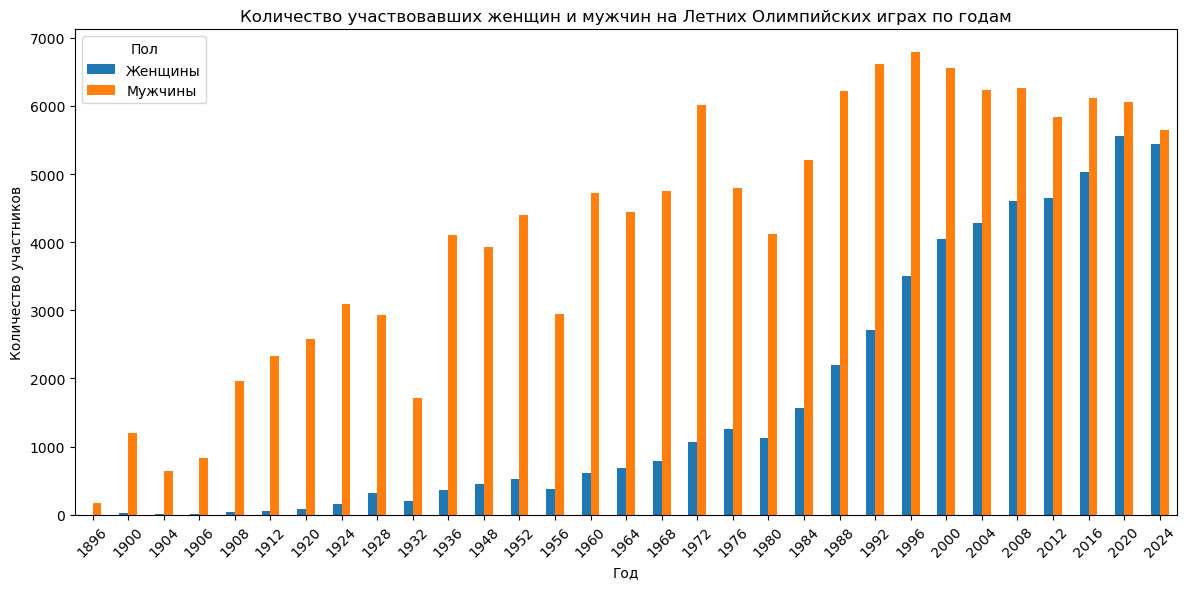

In [149]:
import matplotlib.pyplot as plt

df = pd.DataFrame(ds)

df_summer = df[df['Season'] == 'Summer']

gender_counts = df_summer.groupby(['Year', 'Sex'])['Name'].nunique().unstack(fill_value=0)

# Построение графика
gender_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Количество участвовавших женщин и мужчин на Летних Олимпийских играх по годам')
plt.xlabel('Год')
plt.ylabel('Количество участников')
plt.xticks(rotation=45)
plt.legend(title='Пол', labels=['Женщины', 'Мужчины'])
plt.tight_layout()
plt.show()

7. Какие 10 стран на текущий момент имеют наибольшее количество золотых медалей?


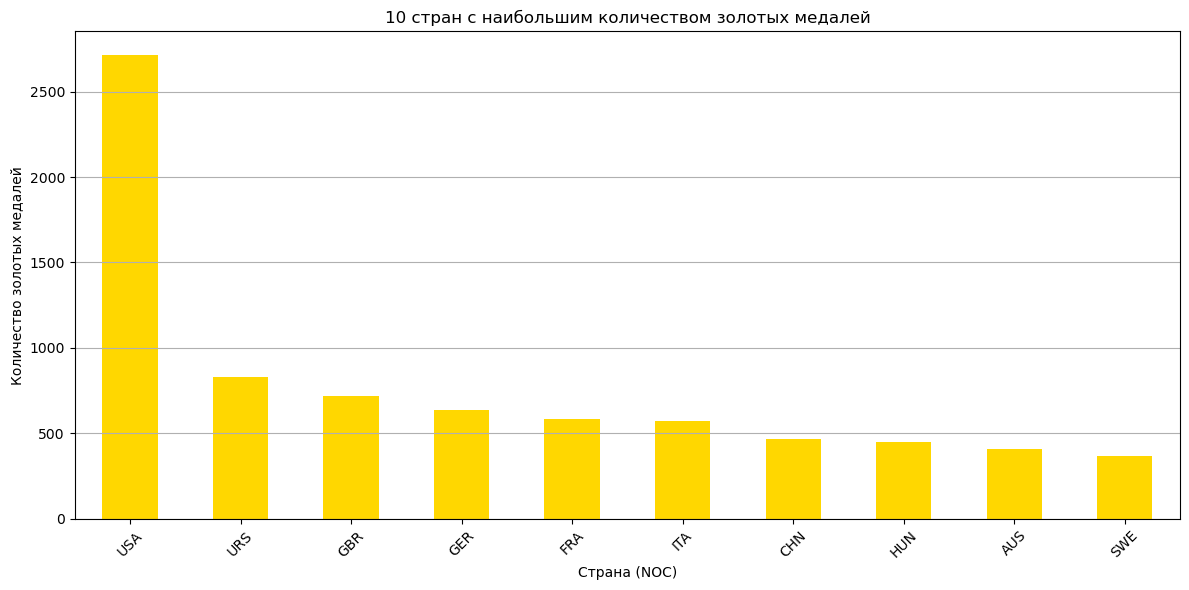

In [152]:
gold_medals = ds[ds['Medal'] == 'Gold']

medals_count = gold_medals['NOC'].value_counts()

top_10_countries = medals_count.head(10)

plt.figure(figsize=(12, 6))
top_10_countries.plot(kind='bar', color='gold')
plt.title('10 стран с наибольшим количеством золотых медалей')
plt.xlabel('Страна (NOC)')
plt.ylabel('Количество золотых медалей')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

8. Сколько золотых, серебряных и бронзовых медалей зарабатывал СССР отдельно по каждым играм?

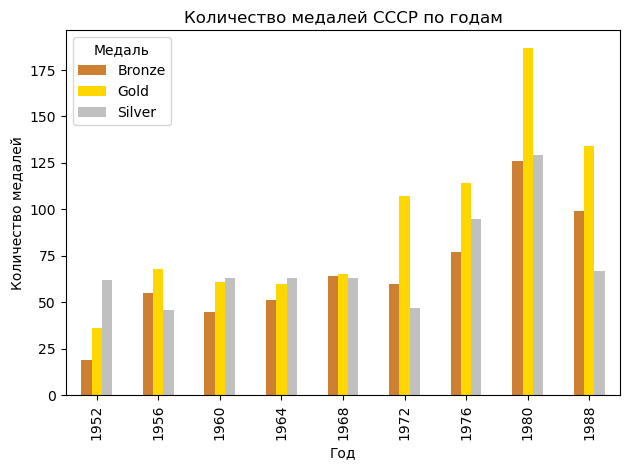

In [155]:
data_ussr = ds[ds['NOC'] == 'URS']

medal_counts = data_ussr[data_ussr['Medal'].isin(['Gold', 'Silver', 'Bronze'])].groupby(['Year', 'Medal']).size().unstack(fill_value=0)

colors = ['#CD7F32', 'gold', 'silver']
medal_counts.plot(kind='bar', color=colors)
plt.title('Количество медалей СССР по годам')
plt.xlabel('Год')
plt.ylabel('Количество медалей')
plt.legend(title='Медаль', loc='upper left')
plt.tight_layout()
plt.show()


9. Сколько медалей завоёвывали спортсмены и спортсменки (отдельно) команды Китая на каждой олимпиаде?


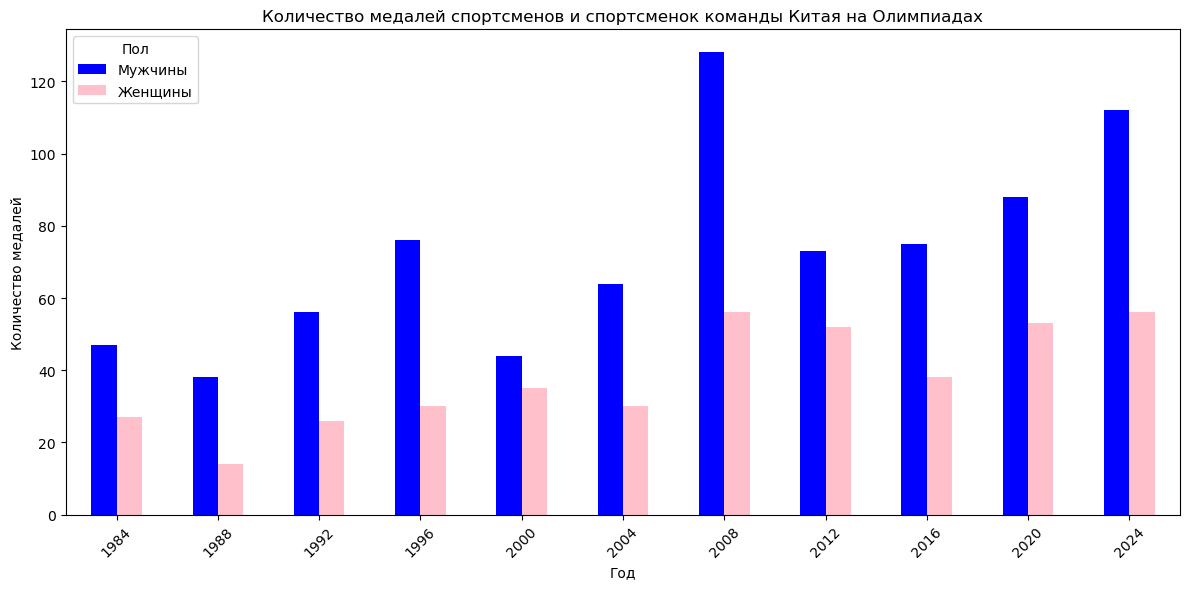

In [158]:
china_data = ds[ds['NOC'] == 'CHN']

medal_counts = china_data[china_data['Medal'] != 'No medal'].groupby(['Year', 'Sex'])['Medal'].count().unstack(fill_value=0)

medal_counts.plot(kind='bar', color=['blue', 'pink'], figsize=(12, 6))

plt.title('Количество медалей спортсменов и спортсменок команды Китая на Олимпиадах')
plt.xlabel('Год')
plt.ylabel('Количество медалей')
plt.xticks(rotation=45)
plt.legend(title='Пол', labels=['Мужчины', 'Женщины'], loc='upper left')
plt.tight_layout()
plt.show()

10. Какие 10 стран имеют наибольшее количество участников, не получивших никаких медалей ни на одной из Летних олимпиад?

<Figure size 1000x600 with 0 Axes>

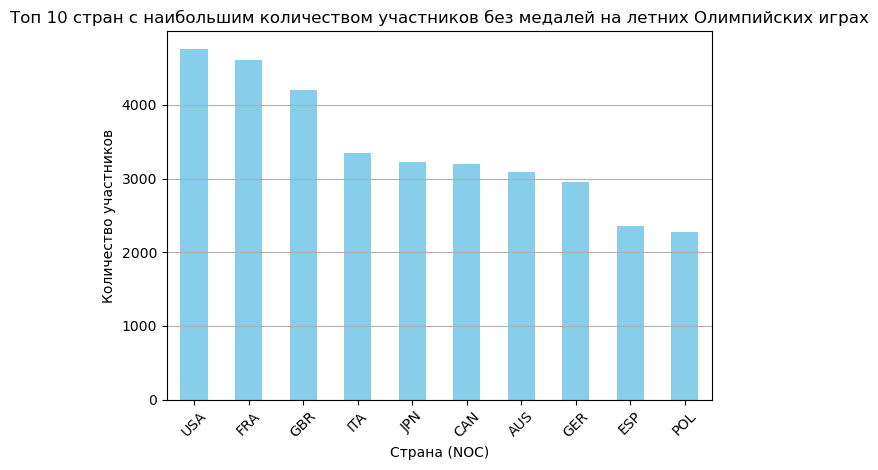

In [163]:
import matplotlib.pyplot as plt

summer_olympics_data = ds[ds['Season'] == 'Summer']

no_medal_participants = summer_olympics_data.groupby('Name').filter(lambda x: (x['Medal'] == 'No medal').all()).drop_duplicates(subset=['Name'])

no_medal_participants_with_country = no_medal_participants[['Name', 'NOC']]

no_medal_counts = no_medal_participants_with_country.groupby('NOC').size().reset_index(name='No_Medal_Count')

top_10_no_medal_countries = no_medal_counts.sort_values(by='No_Medal_Count', ascending=False).head(10)

plt.figure(figsize=(10, 6))

top_10_no_medal_countries.plot(kind='bar', x='NOC', y='No_Medal_Count', color='skyblue', legend=False)

plt.title('Топ 10 стран с наибольшим количеством участников без медалей на летних Олимпийских играх')
plt.xlabel('Страна (NOC)')
plt.ylabel('Количество участников')

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Выводы:**
в ходе работы я ознакомился с библиотеками Numpy, Pandas и Matplotlib языка программирования Python. Были проделаны операции с матрицами, векторами, массивами и были подготовлены наборы данных из csv файла для разных задач. Были даны ответы как текстовые, так и в виде диаграммы. Работа показалась мне интересной, было много новых для меня заданий, например, я работал впервые с матрицами на компьютере и использовал файл в формате csv. Это задание является в своём роде подготовительным этапом к основной деятельности в ML, сейчас мы научились использовать для наших задач и визуализировать данные, в том числе и в большом объёме.